In [1]:
using Interact, Plots, DifferentialEquations, LinearAlgebra
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

# Ecuacion diferencial lineal en 2D

Un flujo 2D en el plano $(x,y)$ de forma general esta dado por las ecuaciones diferenciales:

$\dot{x} = f(x,y)$

$\dot{y} = g(x,y)$

donde $f$ y $g$ son dos funciones de dos variables que tambien pueden verse como una **funcion vectorial** o un **campo vector**
Para el caso en el que $f$ y $g$ son funciones lineales podemos escribir de forma general:

$\dot{x} = ax+by$

$\dot{y} = cx+dy$

O de forma mas compacta usando notacion matricial

${\bf \dot{x}} = {\bf Ax}$

donde

${\bf x} = \begin{pmatrix}x\\y\end{pmatrix}\quad{\bf A} =\begin{pmatrix}a & b\\c & d\end{pmatrix}$

Cualquier termino constante que se agregue a las forma anterior se puede eliminar haciendo un cambio **lineal** de coordenadas por lo tanto decimos que esta es la forma general de un flujo 2D lineal, con un punto fijo en el origen.

Dependiendo de los autovalores de la matriz $A$ ese punto fijo puede ser atractor (nodo o espiral), repulsor (nodo o espiral), punto silla (saddle) o un centro. Vamos a ver los casos uno por uno

## Autovalores y Autovectores

Para el caso de matrices de 2x2 la ecuacion caracteristica para el calculo de los autovalores $det({\bf A} - \lambda{\bf I}) = 0$ se puede escribir como:

$\lambda^2-\tau\lambda+\Delta=0$

donde $\tau$ es la traza de la matriz ${\bf A}$, es decir $\tau=a+d$,

y $\Delta$ es el determinante de la matriz ${\bf A}$, es decir $\Delta=ad-bc$

Por lo tanto los dos autovalores de la matriz son:

$\lambda_1 = \frac{\tau+\sqrt{\tau^2-4\Delta}}{2} \quad \quad \lambda_2 = \frac{\tau-\sqrt{\tau^2-4\Delta}}{2}$ 

## Nodo atractor

en el caso en el que la matriz ${\bf A}$ tiene dos autovalores reales negativos tenemos un nodo atractor. Por ejemplo:

$\dot{x} = -x+y$

$\dot{y} = x-2y$

La matriz en este caso es

${\bf A} =\begin{pmatrix}-1 & 1\\1 & -2\end{pmatrix}$

La traza es -3 y el determinante 1. Por lo tanto
sus autovalores son ambos reales negativos $\lambda_1=(-3+\sqrt{5})/2=-0.38197$ $\lambda_2=(-3+\sqrt{5})/2=-2.61803$

Los autovalores los podemos calcular numericamente tambien usando la funcion *eig* del modulo de algebra lineal de numpy

In [2]:
# Definimos la matriz
A = [-1 1; 1 -2]

2×2 Matrix{Int64}:
 -1   1
  1  -2

In [3]:
# sus autovalores
eigen(A).values

2-element Vector{Float64}:
 -2.618033988749895
 -0.38196601125010515

In [4]:
#definimos la ecuacion diferencial lineal general
flinear(u,p,t) = A*u

flinear (generic function with 1 method)

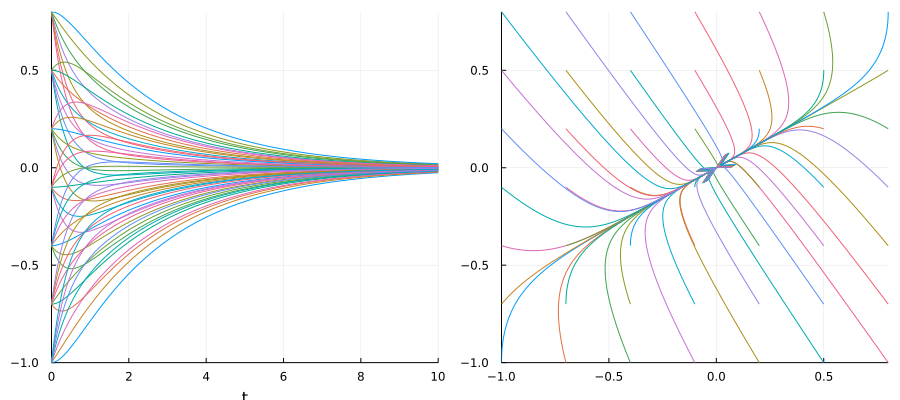

In [5]:
u0_arr = vec([[0.3*i-1;0.3*j-1] for i=0:6, j=0:6])
prob = ODEProblem(flinear, [0.2;0.2], (0,10))
function prob_func(prob,i,repeat)
  remake(prob,u0=u0_arr[i])
end
sol = solve(EnsembleProblem(prob,prob_func=prob_func),EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(0,1))
p2 = plot(sol,vars=(1,2),arrow=true)
plot(p1,p2,layout=(1,2),size=(900,400),fmt = :png)

Notar que tiende hacia el punto fijo mas rapido en una direccion y mas lentamente en la otra, esto es debido 
a que uno de los autovalores es unas siete veces mayor que el otro, la direccion en rapida y la lenta estan dadas 
por los autovectores asociados a los autovalores

In [6]:
av = eigen(A).vectors

2×2 Matrix{Float64}:
 -0.525731  -0.850651
  0.850651  -0.525731

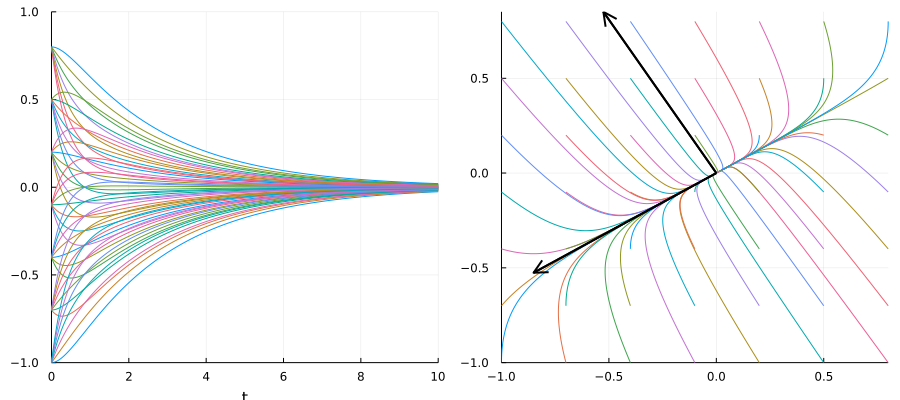

In [7]:
p1 = plot(sol,vars=(0,1),ylims=(-1,1))
p2 = plot(sol,vars=(1,2))
plot!(p2,[0,av[1,1]],[0,av[2,1]],arrow=true,linewidth=2,color=:black)
plot!(p2,[0,av[1,2]],[0,av[2,2]],arrow=true,linewidth=2,color=:black)
plot(p1,p2,layout=(1,2),size=(900,400),fmt = :png)

## Foco atractor

en el caso en el que la matriz ${\bf A}$ tiene dos autovalores complejos (conjugados) con parte real negativa tenemos un foco (espiral) atractor. Un ejemplo:

$\dot{x} = -x+-y$

$\dot{y} = x-2y$

La matriz en este caso es

${\bf A}=\begin{pmatrix}-1 & -1\\1 & -2\end{pmatrix}$

En este caso la traza sigue siendo $\tau=-3$ pero el determinante es $\Delta=3$
por lo tanto discriminante $\tau^2-4\Delta$ es negativo y los autovalores son complejos conjugados.
$\lambda_1=(-3+\sqrt{3}j)/2 = -1.5+0.866j$ , y 
$\lambda_2=(-3-\sqrt{3}j)/2 = -1.5+0.866j$

In [8]:
A = [-1 -1; 1 -2]
eigen(A).values

2-element Vector{ComplexF64}:
 -1.5 - 0.8660254037844385im
 -1.5 + 0.8660254037844385im

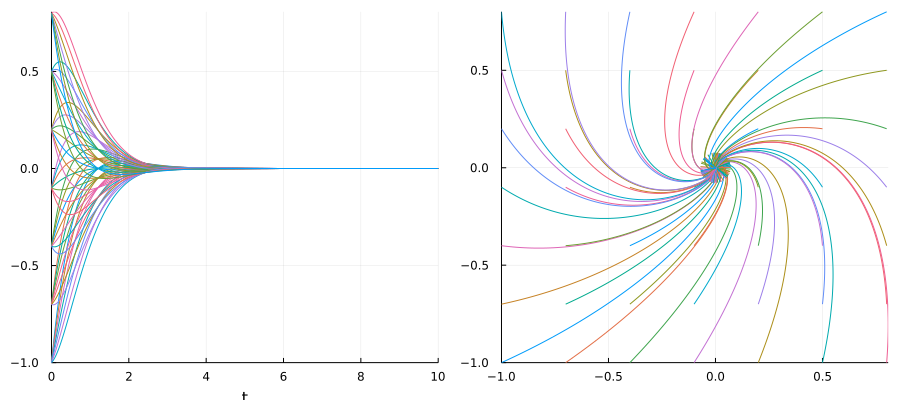

In [9]:
sol = solve(EnsembleProblem(prob,prob_func=prob_func),EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(0,1))
p2 = plot(sol,vars=(1,2),arrow=true)
plot(p1,p2,layout=(1,2),size=(900,400),fmt = :png)

## Punto Silla (Saddle)

en el caso en el que la matriz ${\bf A}$ tiene un autovalor positivo y el otro negativo tenemos un punto silla. Un ejemplo:

$\dot{x} = x+y$

$\dot{y} = x-2y$

La matriz en este caso es

${\bf A}=\begin{pmatrix}1 & 1\\1 & -2\end{pmatrix}$

La traza es ahora $\tau=-1$ y el determinante es negativo $\Delta=-3$
Los autovalores: 1.3027 y -2.3027

SIEMPRE que el Determinante es negativo los autovalores son uno positivo y otro negativo porque estamos sumando y restando a $\tau$ un numero que es mayor a $\tau$ (la raiz del discriminante), por lo tanto tenemos un punto silla

In [10]:
A = [1 1; 1 -2]
eigen(A).values

2-element Vector{Float64}:
 -2.302775637731995
  1.3027756377319946

[-0.28978414868843005 -0.9570920264890529; 0.9570920264890529 -0.28978414868843005]

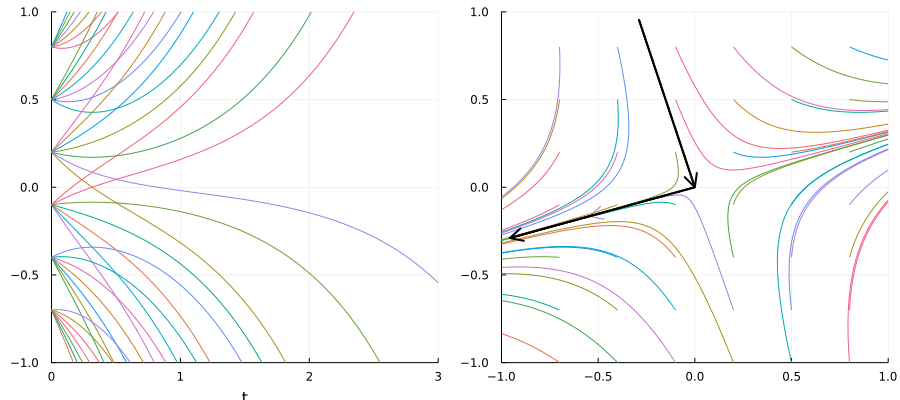

In [11]:
prob = ODEProblem(flinear, [0.2;0.2], (0,3))
sol = solve(EnsembleProblem(prob,prob_func=prob_func),EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(0,1),ylims=(-1,1))
p2 = plot(sol,vars=(1,2),arrow=true,xlims=(-1,1),ylims=(-1,1))
av = eigen(A).vectors
print(av)
plot!(p2,[av[1,1],0],[av[2,1],0],arrow=true,linewidth=2,color=:black)
plot!(p2,[0,av[1,2]],[0,av[2,2]],arrow=true,linewidth=2,color=:black)
plot(p1,p2,layout=(1,2),size=(900,400),fmt = :png)

 Los autovectores (columna) 
 
$\begin{pmatrix}0.9571 \\0.2898\end{pmatrix} \quad \begin{pmatrix}-0.2898\\0.9571\end{pmatrix}$

corresponden a los autovalores negativo (atraccion) y positivo (repulsor) y como vectores en el plano $(x,y)$ e indican las direcciones a lo largo de las cuales el flujo 2D es atraido y repelido respectivamente

## Nodo y Foco Repulsor
Cambiando el signo de los flujos de arriba  se pueden obtener un nodo y foco repulsor. Al cambiar el signo de $a,b,c,d$ cambia de signo la Traza pero no el Determinante. 

El signo de la traza es el que me da la estabilidad del nodo/foco. Traza negativa es estable y traza positiva es inestable

## Centro

Para el caso particular en el que la parte real del autovalor se hace cero tenemos un centro, esto sucede para un valor especifico de parametros y no es generico como los puntos anteriores (o estructuralmente estable). Cualquier perturbacion de un centro me lleva a un foco atractor a uno repulsor. De hecho podemos ver al centro como el cambio de estabilidad de un foco repulsor a uno atractor. 

Un ejemplo clasico de un repulsor es el del oscilador armonico sin friccion

$\dot{x} = y$

$\dot{y} = -x$

La matriz en este caso es

${\bf A}=\begin{pmatrix}0 & 1\\-1 & 0\end{pmatrix}$

y tiene como autovalores: j y -j

In [12]:
A = [0 1; -1 0]
eigen(A).values

2-element Vector{ComplexF64}:
 0.0 - 1.0im
 0.0 + 1.0im

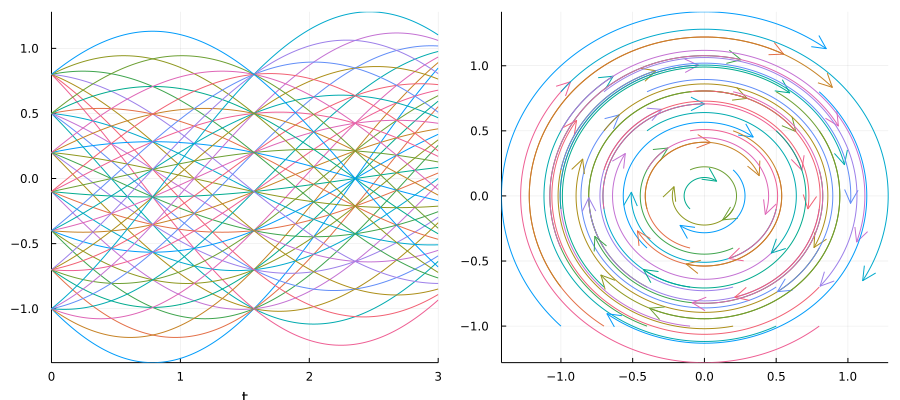

In [13]:
sol = solve(EnsembleProblem(prob,prob_func=prob_func),EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(0,1))
p2 = plot(sol,vars=(1,2),arrow=true)
plot(p1,p2,layout=(1,2),size=(900,400),fmt = :png)

# Clasificacion de los sistemas lineales 

A partir de la Traza y el Determinante podemos clasificar los puntos fijos segun su tipo y estabilidad.

En el siguiente grafico interactivo para simplificar podemos asumir que en la matriz 

$\begin{pmatrix}a & b\\c & d\end{pmatrix}$

$b=1$, y podemos ajustar la traza y el determinante de forma independiente y a partir de esos dos valores y de un valor libre de $d$ podemos determinar los valores de $a$ y $b$. La matriz entonces va a ser

$\begin{pmatrix}Tr - d & 1\\(Tr-d)d-\Delta & d\end{pmatrix}$

Puede resultar un poco rebuscado pero es mas intuitivo ajustar la traza y el determinante, sobre todo mirando el grafico de la derecha (a la izquierda esta el flujo), que controlando los elementos de la matriz ($a,b,c,d$) de forma independiente. De todas formas en el grafico donde se muestra la ubicacion del punto en el grafico de traza y determinante se muestran tambien los valores de la matriz.

Notar que lo que influye en la estabilidad son solo la Traza y el Determinante, el elemento $d$ lo que hace es rotar el flujo o cambiar la velocidad de las trayectorias.

In [18]:
# ESTO ES INTERACTIVO EN EL NAVEGADOR
#traza = -0.5; determ = 0.5; d=1.0
@manipulate throttle=0.5 for traza=-1.8:0.02:1.8, determ=-1:0.01:1, d=-1:0.01:1
    b=1.0;
    a=traza-d;
    c=(a*d-determ)/b
    A = round.([a b; c d],digits=2)
    classification_linear(A)
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["traza"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 181, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
91, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007d0e5460, Task (runnable) @0x000000007d0e5460), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.8\",\"-1.78\",\"-1.76\",\"-1.74\",\"-1.72\",\"-1.7\",\"-1.68\",\"-1.66\",\"-1.64\",\"-1.62\",\"-1.6\",\"-1.58\",\"-1.56\",\"-1.54\",\"-1.52\",\"-1.5\",\"-1.48\",\"-1.46\",\"-1.44\",\"-1.42\",\"-1.4\",\"

# Nulclinas 

Para el Flujo 2D general:

$\dot{x} = f(x,y)$

$\dot{y} = g(x,y)$

los puntos fijos seran aquellos que satisfacen simultaneamente

$f(x,y) = 0$

$g(x,y) = 0$

Cada una de estas ecuaciones se puede ver como la forma implicita de una curva en el plano $(x,y)$ y se conoce como *nulclina*. Podemos representar esas dos curvas en el plano (la nulclina de $\dot{x}=0$ y la nulclina de $\dot{y}=0$). Los puntos fijos estaran entonces en los puntos donde se corten estas dos curvas. Claramente para el caso lineal las nulclinas son dos rectas que de forma generica se cortan en solo un punto.

Vamos a incorporar una representacion del espacio de fases bidimensional que nos va a ayudar a inferir el flujo, al menos en los casos mas simples, sin necesidad de integrar el sistema.

Vamos a representar las curvas nulclinas $\dot{x}=0$ en rojo y $\dot{y}=0$ en azul. Pero tambien vamos a diferenciar las regiones que dividen estas nulclinas con colores con transparencia. 

En combinacion con los colores transparentes de la nulclina anterior tenemos cuatro tipo de regiones:

- color verde + azul = cyan donde el flujo va hacia la derecha ($\dot{x}>0$) y abajo ($\dot{y}<0$)
- color verde + amarillo = verde donde el flujo va hacia la derecha ($\dot{x}>0$) y arriba ($\dot{y}>0$)
- color rojo + amarillo = naranja donde el flujo va hacia la izquierda ($\dot{x}<0$) y arriba ($\dot{y}>0$)
- color rojo + azul = magenta donde el flujo va hacia la izquierda ($\dot{x}<0$) y abajo ($\dot{y}<0$)

Como dato adicional estos colores se forman cuatro regiones que se juntan en el punto fijo y el ordenamiento de estas regiones nos permite decidir si el punto fijo es un punto silla o no, si el ordenamiento es cyan-verde-naranja-magenta en sentido antihorario es un nodo/foco, si en cambio ese ordenamiento esta en sentido horario es un punto silla. Esto es tambien porque si tomamos a la matriz A como una transformacion lineal en el plano, cuando su determinante es negativo esa tranformacion "invierte" el plano como si estuviesemos viendo el plano como una hoja de papel desde el otro lado. 

In [15]:
function flinearin!(du,u,p,t)
    (a,b,c,d)=p
    du[1]=a*u[1]+b*u[2]
    du[2]=c*u[1]+d*u[2]
    du
end

flinearin! (generic function with 1 method)

In [17]:
# ESTO ES INTERACTIVO EN EL NAVEGADOR
# traza = -0.5; determ=0.5; d=1.0
@manipulate throttle=0.5 for traza=-2:0.02:2, determ=-1:0.01:1, d=-1:0.01:1
    b=1.0;
    a=traza-d;
    c=(a*d-determ)/b
    A = [a b; c d]
    solve_plot_nullclines_flux(flinearin!,2.0,[a,b,c,d],Ngrid=7,size=(500,500))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["traza"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007c464330, Task (runnable) @0x000000007c464330), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-2.0\",\"-1.98\",\"-1.96\",\"-1.94\",\"-1.92\",\"-1.9\",\"-1.88\",\"-1.86\",\"-1.84\",\"-1.82\",\"-1.8\",\"-1.78\",\"-1.76\",\"-1.74\",\"-1.72\",\"-1.7\",\"-1.68\",\"-1.66\",\"-1.64\",\"-1.62\",\"-1.6\",\